# FIXED COUPON BOND EXAMPLE TREASURY

This is a US Treasury bond analysis based on example in https://data.bloomberglp.com/bat/sites/3/2017/07/SF-2017_Paul-Fjeldsted.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.bonds.TuringBond import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 14:09 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



# Define the Bond

In [3]:
issueDate = TuringDate(15, 5, 2010)
maturityDate = TuringDate(15, 5, 2027)
coupon = 0.02375
freqType = TuringFrequencyTypes.SEMI_ANNUAL
accrualType = TuringDayCountTypes.ACT_ACT_ICMA
face = ONE_MILLION

In [4]:
bond = TuringBond(issueDate, maturityDate, coupon, freqType, accrualType, face)

In [5]:
cleanPrice = 99.7808417  # if face is 1 then this must be 0.99780842

You can get information about the bond using the print method.

In [6]:
print(bond)

OBJECT TYPE: TuringBond
ISSUE DATE: 15-MAY-2010
MATURITY DATE: 15-MAY-2027
COUPON: 0.02375
FREQUENCY: TuringFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: TuringDayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 1000000


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [7]:
settlementDate = TuringDate(21, 7, 2017)

In [8]:
bond.printFlows(settlementDate)

 15-NOV-2017      11875.00 
 15-MAY-2018      11875.00 
 15-NOV-2018      11875.00 
 15-MAY-2019      11875.00 
 15-NOV-2019      11875.00 
 15-MAY-2020      11875.00 
 15-NOV-2020      11875.00 
 15-MAY-2021      11875.00 
 15-NOV-2021      11875.00 
 15-MAY-2022      11875.00 
 15-NOV-2022      11875.00 
 15-MAY-2023      11875.00 
 15-NOV-2023      11875.00 
 15-MAY-2024      11875.00 
 15-NOV-2024      11875.00 
 15-MAY-2025      11875.00 
 15-NOV-2025      11875.00 
 15-MAY-2026      11875.00 
 15-NOV-2026      11875.00 
 15-MAY-2027    1011875.00 


The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

Current yield is the coupon over the price

In [9]:
print("Current Yield %12.7f %%" % (bond.currentYield(cleanPrice)*100))

Current Yield    2.3802164 %


Yield to maturity using different conventions

In [10]:
for ytmCalcType in TuringYTMCalcType:
    y = bond.yieldToMaturity(settlementDate, cleanPrice, ytmCalcType)
    print("%30s %12.7f" % (ytmCalcType, y*100))

         TuringYTMCalcType.UK_DMO    2.4000000
      TuringYTMCalcType.US_STREET    2.4000000
    TuringYTMCalcType.US_TREASURY    2.3998103


## Vectorizations

Some bond function such as yield to maturity support vectorisation

In [11]:
cleanPrices = np.linspace(70,150,20)

In [12]:
ylds = bond.yieldToMaturity(settlementDate, cleanPrices, TuringYTMCalcType.US_TREASURY)

Text(0, 0.5, 'Clean Prices')

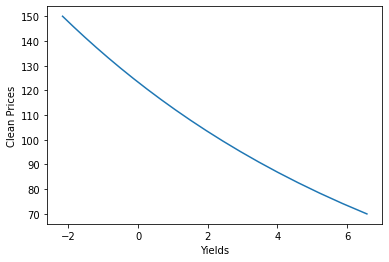

In [13]:
plt.plot(ylds*100.0, cleanPrices)
plt.xlabel("Yields")
plt.ylabel("Clean Prices")

In [15]:
cleanPricesOut = bond.cleanPriceFromYTM(settlementDate, ylds, TuringYTMCalcType.US_TREASURY)

In [17]:
cleanPricesOut - cleanPrices

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

And so we recover the initial input clean prices.

## Accrued Interest

For consistency let's fix the yield calculation convention to be US Treasury

In [18]:
yieldConvention = TuringYTMCalcType.US_TREASURY

In [19]:
ytm = bond.yieldToMaturity(settlementDate, cleanPrice, yieldConvention)

Full price is the clean price plus accrued interest

In [20]:
print("Full Price = %12.7f" % bond.fullPriceFromYTM(settlementDate, ytm, yieldConvention))

Full Price =  100.2132466


In [21]:
print("Clean Price = %12.7f" % bond.cleanPriceFromYTM(settlementDate, ytm, yieldConvention))

Clean Price =   99.7808417


Accrued interest is accrued from previous coupon date to settlement date

In [22]:
print("Previous coupon date is ", bond._pcd)

Previous coupon date is  15-MAY-2017


In [23]:
print("Settlement date is ", settlementDate)

Settlement date is  21-JUL-2017


The amount of accrued interest is 

In [24]:
print("Accrued = %12.2f" % bond._accruedInterest)

Accrued =      4324.05


This is based on the following number of days of accrual

In [25]:
print("Accrued Days = %d" % bond._accruedDays)

Accrued Days = 67


In [26]:
print("Principal = %12.2f" % bond.principal(settlementDate, ytm, yieldConvention))

Principal =    997808.42


## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [27]:
duration = bond.dollarDuration(settlementDate, ytm, yieldConvention)
print("Dollar Duration = ", duration)

Dollar Duration =  869.2156049457367


Modified Duration divides the dollar duration by the full price of the bond

In [28]:
modifiedDuration = bond.modifiedDuration(settlementDate, ytm, yieldConvention)
print("Modified Duration = ", modifiedDuration)

Modified Duration =  8.673659765665757


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [29]:
macauleyDuration = bond.macauleyDuration(settlementDate, ytm, yieldConvention)
print("Macauley Duration = ", macauleyDuration)

Macauley Duration =  8.777735455427267


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [30]:
conv = bond.convexityFromYTM(settlementDate, ytm, yieldConvention)
print("Convexity = ", conv)

Convexity =  0.8513814741403719


Copyright (c) 2020 Dominic O'Kane